In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [258]:

data = "student_depression.csv"
df = pd.read_csv(data)
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [259]:
# Check for any other missing values
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [260]:
# Example: Show all object (string) columns
df.select_dtypes(include='object').columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [261]:
print(df.columns.tolist())

['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [262]:
# Rename columns to lowercase and replace spaces/special characters with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('?', '')

df = df[df['dietary_habits'] != 'Others']

# Drop irrelavent columns
cols_to_remove = ['id', 'profession', 'degree']
for col in cols_to_remove:
    if col in df.columns:
        df.drop(columns=col, inplace=True)
df.rename(columns={'have_you_ever_had_suicidal_thoughts_': 'suicidal_thoughts'}, inplace=True)
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 27889 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            27889 non-null  object 
 1   age                               27889 non-null  float64
 2   city                              27889 non-null  object 
 3   academic_pressure                 27889 non-null  float64
 4   work_pressure                     27889 non-null  float64
 5   cgpa                              27889 non-null  float64
 6   study_satisfaction                27889 non-null  float64
 7   job_satisfaction                  27889 non-null  float64
 8   sleep_duration                    27889 non-null  object 
 9   dietary_habits                    27889 non-null  object 
 10  suicidal_thoughts                 27889 non-null  object 
 11  work_study_hours                  27889 non-null  float64
 12  financial

/var/folders/py/9q1kvfw14vs0dzrsth3hs9w80000gn/T/ipykernel_8537/4283420651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=col, inplace=True)
/var/folders/py/9q1kvfw14vs0dzrsth3hs9w80000gn/T/ipykernel_8537/4283420651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=col, inplace=True)
/var/folders/py/9q1kvfw14vs0dzrsth3hs9w80000gn/T/ipykernel_8537/4283420651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,gender,age,city,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
count,27889,27889.000000,27889,27889.000000,27889.000000,27889.000000,27889.000000,27889.000000,27889,27889,27889,27889.000000,27889,27889,27889.000000
unique,2,NaN,52,NaN,NaN,NaN,NaN,NaN,5,3,2,NaN,6,2,NaN
top,Male,NaN,Kalyan,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,Yes,NaN,5.0,No,NaN
freq,15539,NaN,1570,NaN,NaN,NaN,NaN,NaN,8305,10317,17646,NaN,6712,14389,NaN
mean,NaN,25.822045,NaN,3.141238,0.000430,7.656157,2.943634,0.000681,NaN,NaN,NaN,7.158091,NaN,NaN,0.585464
std,NaN,4.905664,NaN,1.381360,0.044001,1.470712,1.361104,0.044404,NaN,NaN,NaN,3.707538,NaN,NaN,0.492651
min,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,21.000000,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,NaN,25.000000,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,NaN,30.000000,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


In [263]:
# job_satisfaction, profession columns have 1 label dominating the entries
# city col is unbalanced

# sort the features by their types under the categorical umbrella
binary_cols = ['gender', 'suicidal_thoughts', 'family_history_of_mental_illness']
non_ordinal_cols = ['city', 'degree'] # Just don't use
ordinal_cols = ['sleep_duration', 'dietary_habits']
df.head()

,gender,age,city,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0


In [264]:
# Temporary dataframe with all numeric columns
temp_df = df.select_dtypes(include='number').copy()

# Binary Columns
le = LabelEncoder()

for col in binary_cols:
    if df[col].dtype == 'object':
        temp_df[col] = le.fit_transform(df[col])
    else:
        temp_df[col] = df[col]

# Ordinal Columns

df.loc[:, 'sleep_duration'] = df['sleep_duration'].str.strip("'")
df.loc[:, 'dietary_habits'] = df['dietary_habits'].str.strip("'")


# Define mappings
sleep_map = {
    'Less than 5 hours': 4,
    '5-6 hours': 3,
    '7-8 hours': 2,
    'More than 8 hours': 1,
    'Others': 0
}

diet_map = {
    'Unhealthy': 2,
    'Moderate': 1,
    'Healthy': 0
}

# Map and add to temp_df
temp_df['sleep_duration'] = df['sleep_duration'].map(sleep_map)
temp_df['dietary_habits'] = df['dietary_habits'].map(diet_map)

temp_df


,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,depression,gender,suicidal_thoughts,family_history_of_mental_illness,sleep_duration,dietary_habits
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1,1,1,0,3,0
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,0,0,0,1,3,1
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,0,1,0,1,4,0
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,1,0,1,1,2,1
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,0,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,0,0,1,1,3,2
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,0,1,0,1,4,0
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,0,1,0,0,3,2
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,1,0,1,0,4,0


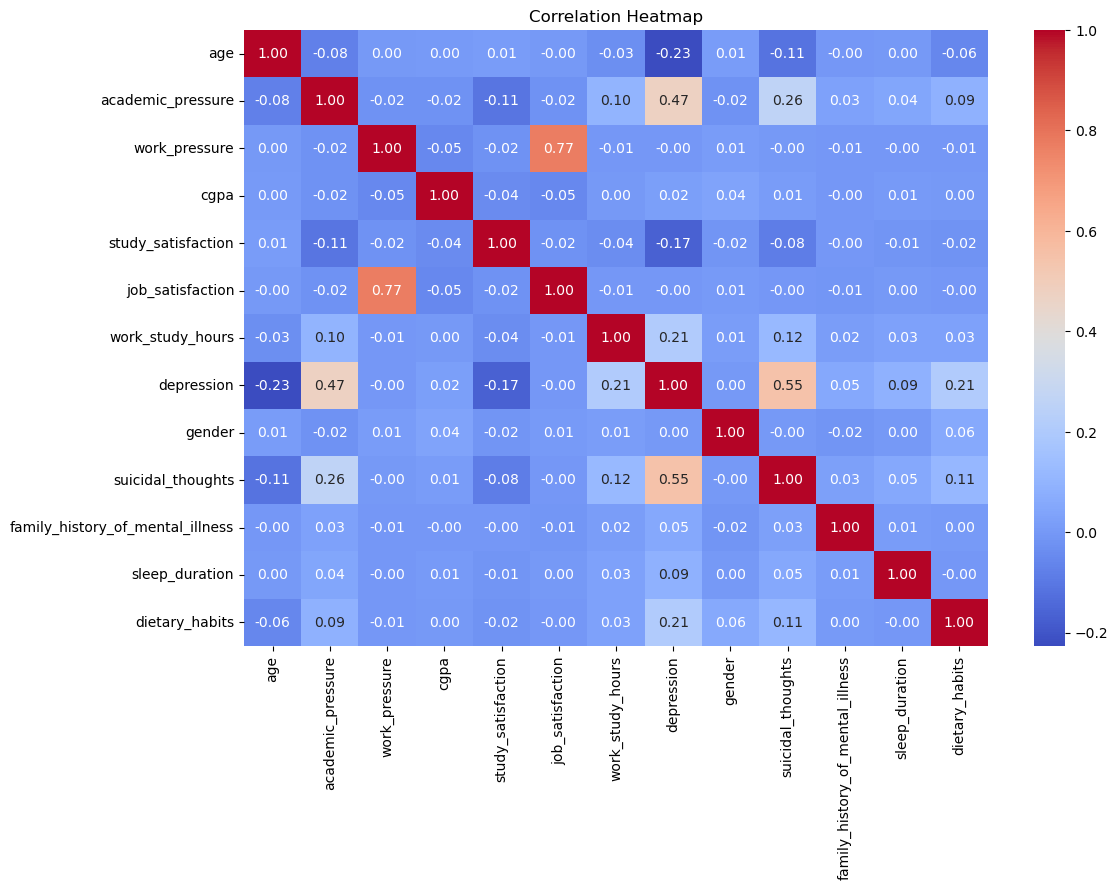

In [265]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix for numeric columns only
correlation_matrix = temp_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [266]:
# Features with the highest correlation to depression
"""
suicidal_thoughts because its the same as depression, we want target depression variable
Most Important Features from the heatmap
academic_pressure	0.47
financial_stress	0.36
work_study_hours 0.21
dietary_habits	0.21
"""

'\nsuicidal_thoughts because its the same as depression, we want target depression variable\nMost Important Features from the heatmap\nacademic_pressure\t0.47\nfinancial_stress\t0.36\nwork_study_hours 0.21\ndietary_habits\t0.21\n'

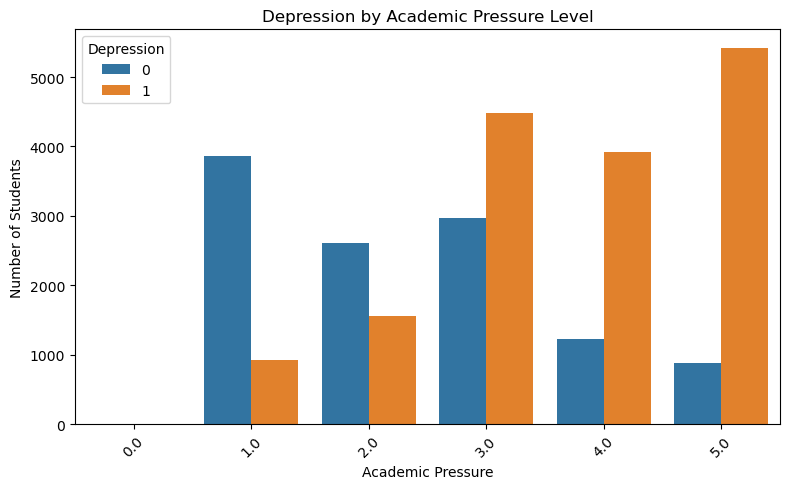

'\nThis graph shows us that as academic pressure increases, depression also increases\nAlso, as academic pressure increases there are less students without depression\n'

In [267]:
# Depression vs. Academic Pressure
plt.figure(figsize=(8, 5))
sns.countplot(x='academic_pressure', hue='depression', data=df)
plt.title('Depression by Academic Pressure Level')
plt.xlabel('Academic Pressure')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
This graph shows us that as academic pressure increases, depression also increases
Also, as academic pressure increases there are less students without depression
"""

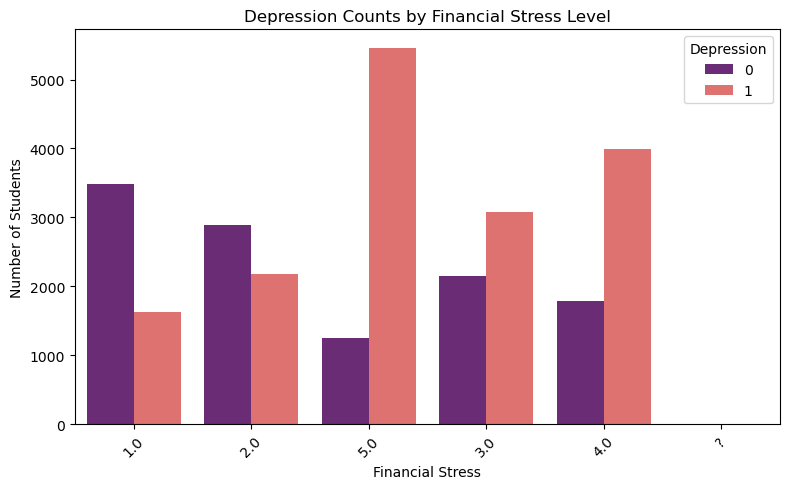

In [268]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='financial_stress', hue='depression', palette='magma')
plt.title('Depression Counts by Financial Stress Level')
plt.xlabel('Financial Stress')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

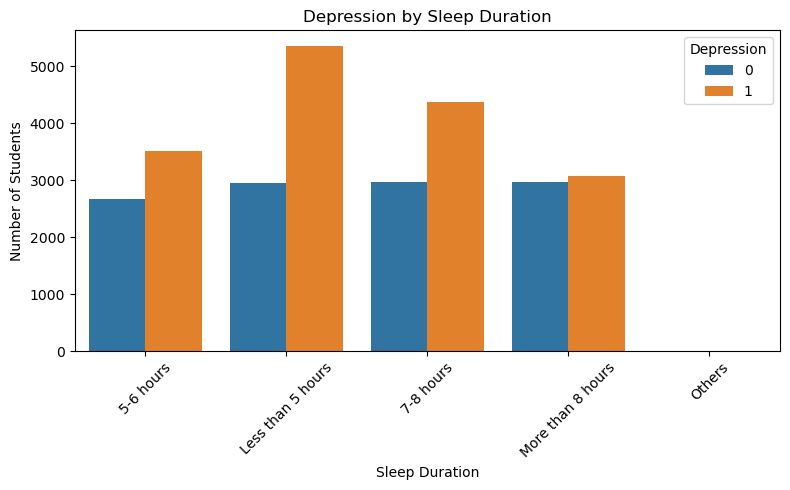

In [269]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sleep_duration', hue='depression', data=df)
plt.title('Depression by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



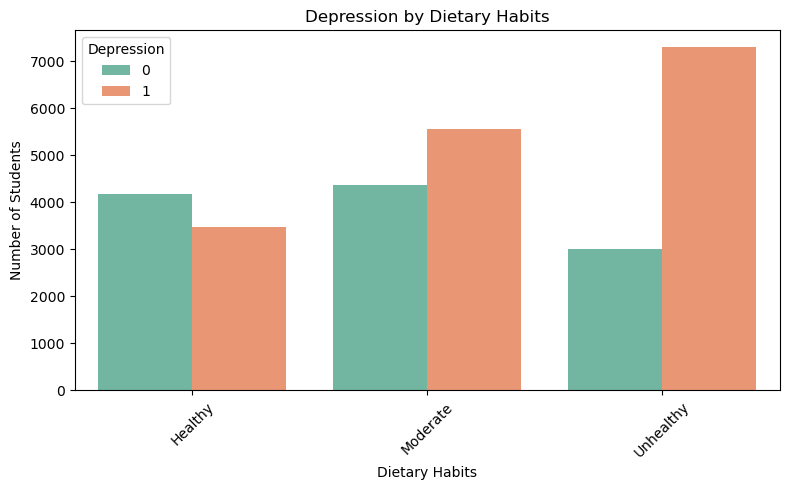

In [270]:
plt.figure(figsize=(8, 5))
sns.countplot(x='dietary_habits', hue='depression', data=df, palette='Set2')
plt.title('Depression by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


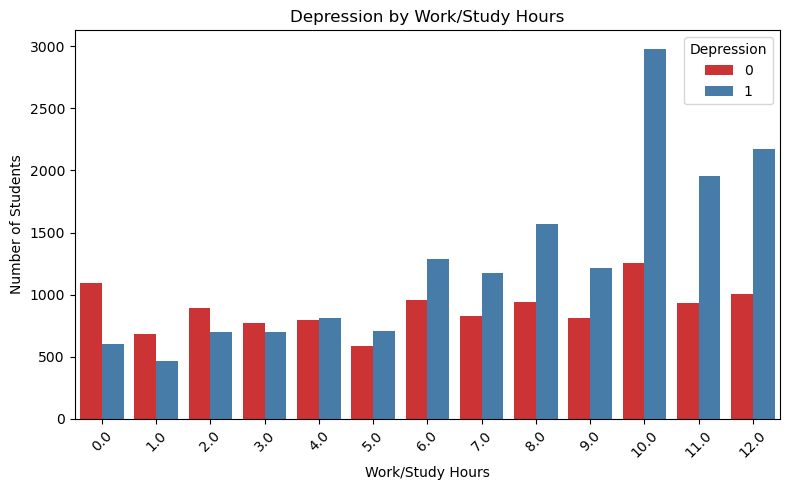

In [271]:
plt.figure(figsize=(8, 5))
sns.countplot(x='work_study_hours', hue='depression', data=df, palette='Set1')
plt.title('Depression by Work/Study Hours')
plt.xlabel('Work/Study Hours')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


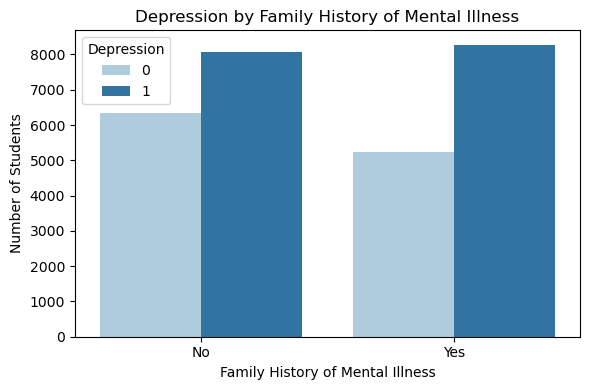

In [272]:
plt.figure(figsize=(6, 4))
sns.countplot(x='family_history_of_mental_illness', hue='depression', data=df, palette='Paired')
plt.title('Depression by Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Number of Students')
plt.legend(title='Depression')
plt.tight_layout()
plt.show()


In [273]:
"""
=====================
📊 Dataset Analysis
=====================



Distribution Highlights
-----------------------
- x
- x
- x
- x

"""

'\n=====================\n📊 Dataset Analysis\n=====================\n\n\n\nDistribution Highlights\n-----------------------\n- x\n- x\n- x\n- x\n\n'

In [274]:
# Encode before training

# Make a copy to avoid SettingWithCopyWarning
df = df.copy()

# Binary columns to encode
binary_cols = ['suicidal_thoughts', 'family_history_of_mental_illness']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to binary columns
for col in binary_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Ordinal column and its mapping
diet_map = {
    'Unhealthy': 2,
    'Moderate': 1,
    'Healthy': 0
}

# Apply mapping to the ordinal column
df['dietary_habits'] = df['dietary_habits'].map(diet_map)



features = [
    'academic_pressure',
    'suicidal_thoughts',
    'dietary_habits',
    'family_history_of_mental_illness',
    'job_satisfaction'
]

target = 'depression'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train models with Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


# Train models with Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [275]:
# Predict & Evaluate

# Predict
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.8051272857655074
Precision: 0.8111014240046498
Recall: 0.8646220570012392
F1 Score: 0.8370070475333633
Confusion Matrix:
 [[1700  650]
 [ 437 2791]]

Random Forest:
Accuracy: 0.8029759770527071
Precision: 0.8042297799371249
Recall: 0.8717472118959108
F1 Score: 0.8366285119667014
Confusion Matrix:
 [[1665  685]
 [ 414 2814]]


In [276]:
# Confusion Matrix Review
'''
Logistic Regression:
True Negatives: 1700    False Positives: 650  
False Negatives: 437    True Positives: 2791

Random Forest:
True Negatives: 1665    False Positives: 685  
False Negatives: 414    True Positives: 2814

Both models are viable for predicting student depression

Logistic Regression slightly favors sensitivity (recall) -> better for detecting at-risk students.
Random Forest slightly favors specificity (precision) -> better for reducing false alarms.

Prioritize every case -> Logistic Regression
Prioritize reducing misclassifications -> Random Forest
'''

'\nLogistic Regression:\nTrue Negatives: 1700    False Positives: 650  \nFalse Negatives: 437    True Positives: 2791\n\nRandom Forest:\nTrue Negatives: 1665    False Positives: 685  \nFalse Negatives: 414    True Positives: 2814\n\nBoth models are viable for predicting student depression\n\nLogistic Regression slightly favors sensitivity (recall) -> better for detecting at-risk students.\nRandom Forest slightly favors specificity (precision) -> better for reducing false alarms.\n\nPrioritize every case -> Logistic Regression\nPrioritize reducing misclassifications -> Random Forest\n'